In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, roc_auc_score

In [2]:
cancer = pd.read_csv(r"C:\Training\Academy\Statistics (Python)\Cases\Wisconsin\BreastCancer.csv",index_col=0)
cancer.head(3)

,Clump,UniCell_Size,Uni_CellShape,MargAdh,SEpith,BareN,BChromatin,NoemN,Mitoses,Class
Code,,,,,,,,,,
61634,5,4,3,1,2,2,2,3,1,Benign
63375,9,1,2,6,4,10,7,7,2,Malignant
76389,10,4,7,2,2,8,6,1,1,Malignant


In [3]:
X = cancer.drop('Class', axis=1)
y = cancer['Class']
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=24, test_size=0.3, stratify=y)

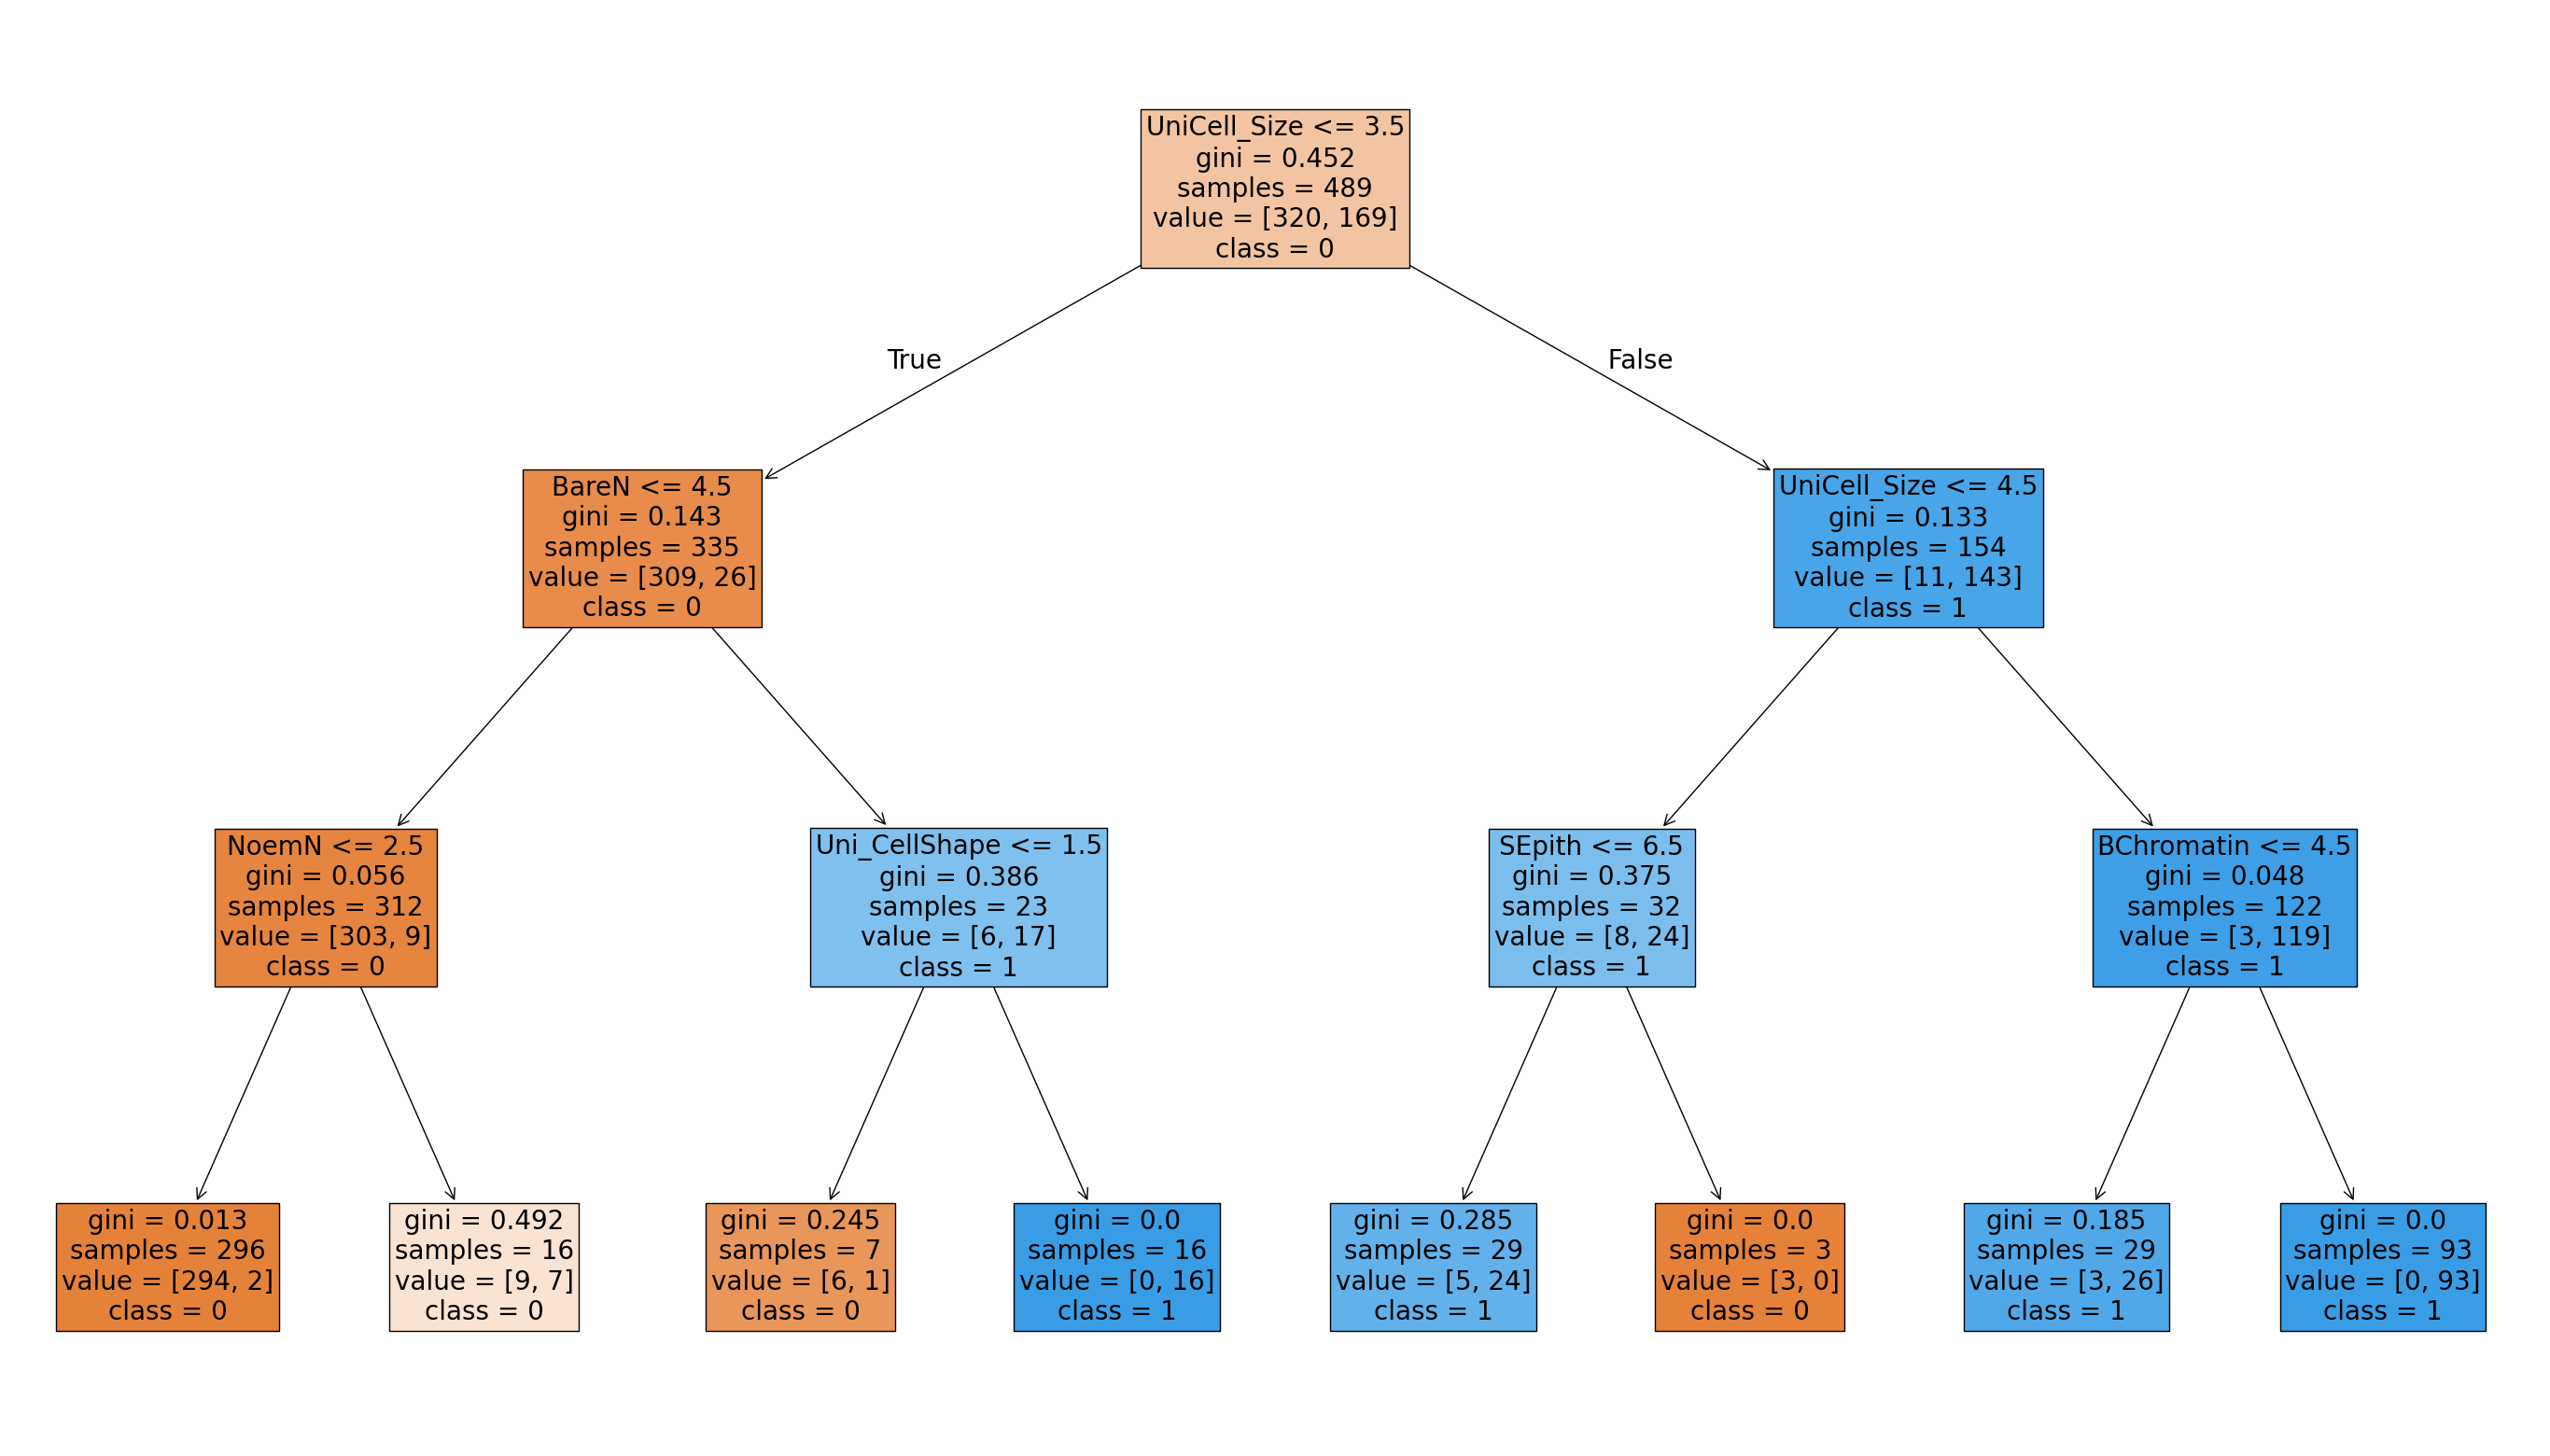

In [4]:
dtc = DecisionTreeClassifier(random_state=24, max_depth=3)
dtc.fit(X_train, y_train)
plt.figure(figsize=(35,20))
plot_tree(dtc,feature_names=list(X.columns), class_names=['0','1'], filled=True,fontsize=20)
plt.show() 

In [5]:
y_pred = dtc.predict(X_test)
print(accuracy_score(y_test, y_pred))

0.9571428571428572


In [6]:
y_pred_prob = dtc.predict_proba(X_test)[:,1]
print(roc_auc_score(y_test, y_pred_prob))

0.9570249597423512


#### Grid Search CV

In [27]:
from sklearn.model_selection import StratifiedKFold, GridSearchCV
dtc = DecisionTreeClassifier(random_state=24)
params = {'max_depth':[2,3,4,5,6,None]}
kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=24)
gcv = GridSearchCV(dtc, param_grid=params, cv=kfold, scoring='roc_auc')
gcv.fit(X, y)

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=24, shuffle=True),
             estimator=DecisionTreeClassifier(random_state=24),
             param_grid={'max_depth': [2, 3, 4, 5, 6, None]},
             scoring='roc_auc')

In [29]:
print(gcv.best_params_)
print(gcv.best_score_)

{'max_depth': 4}
0.9653115056342652


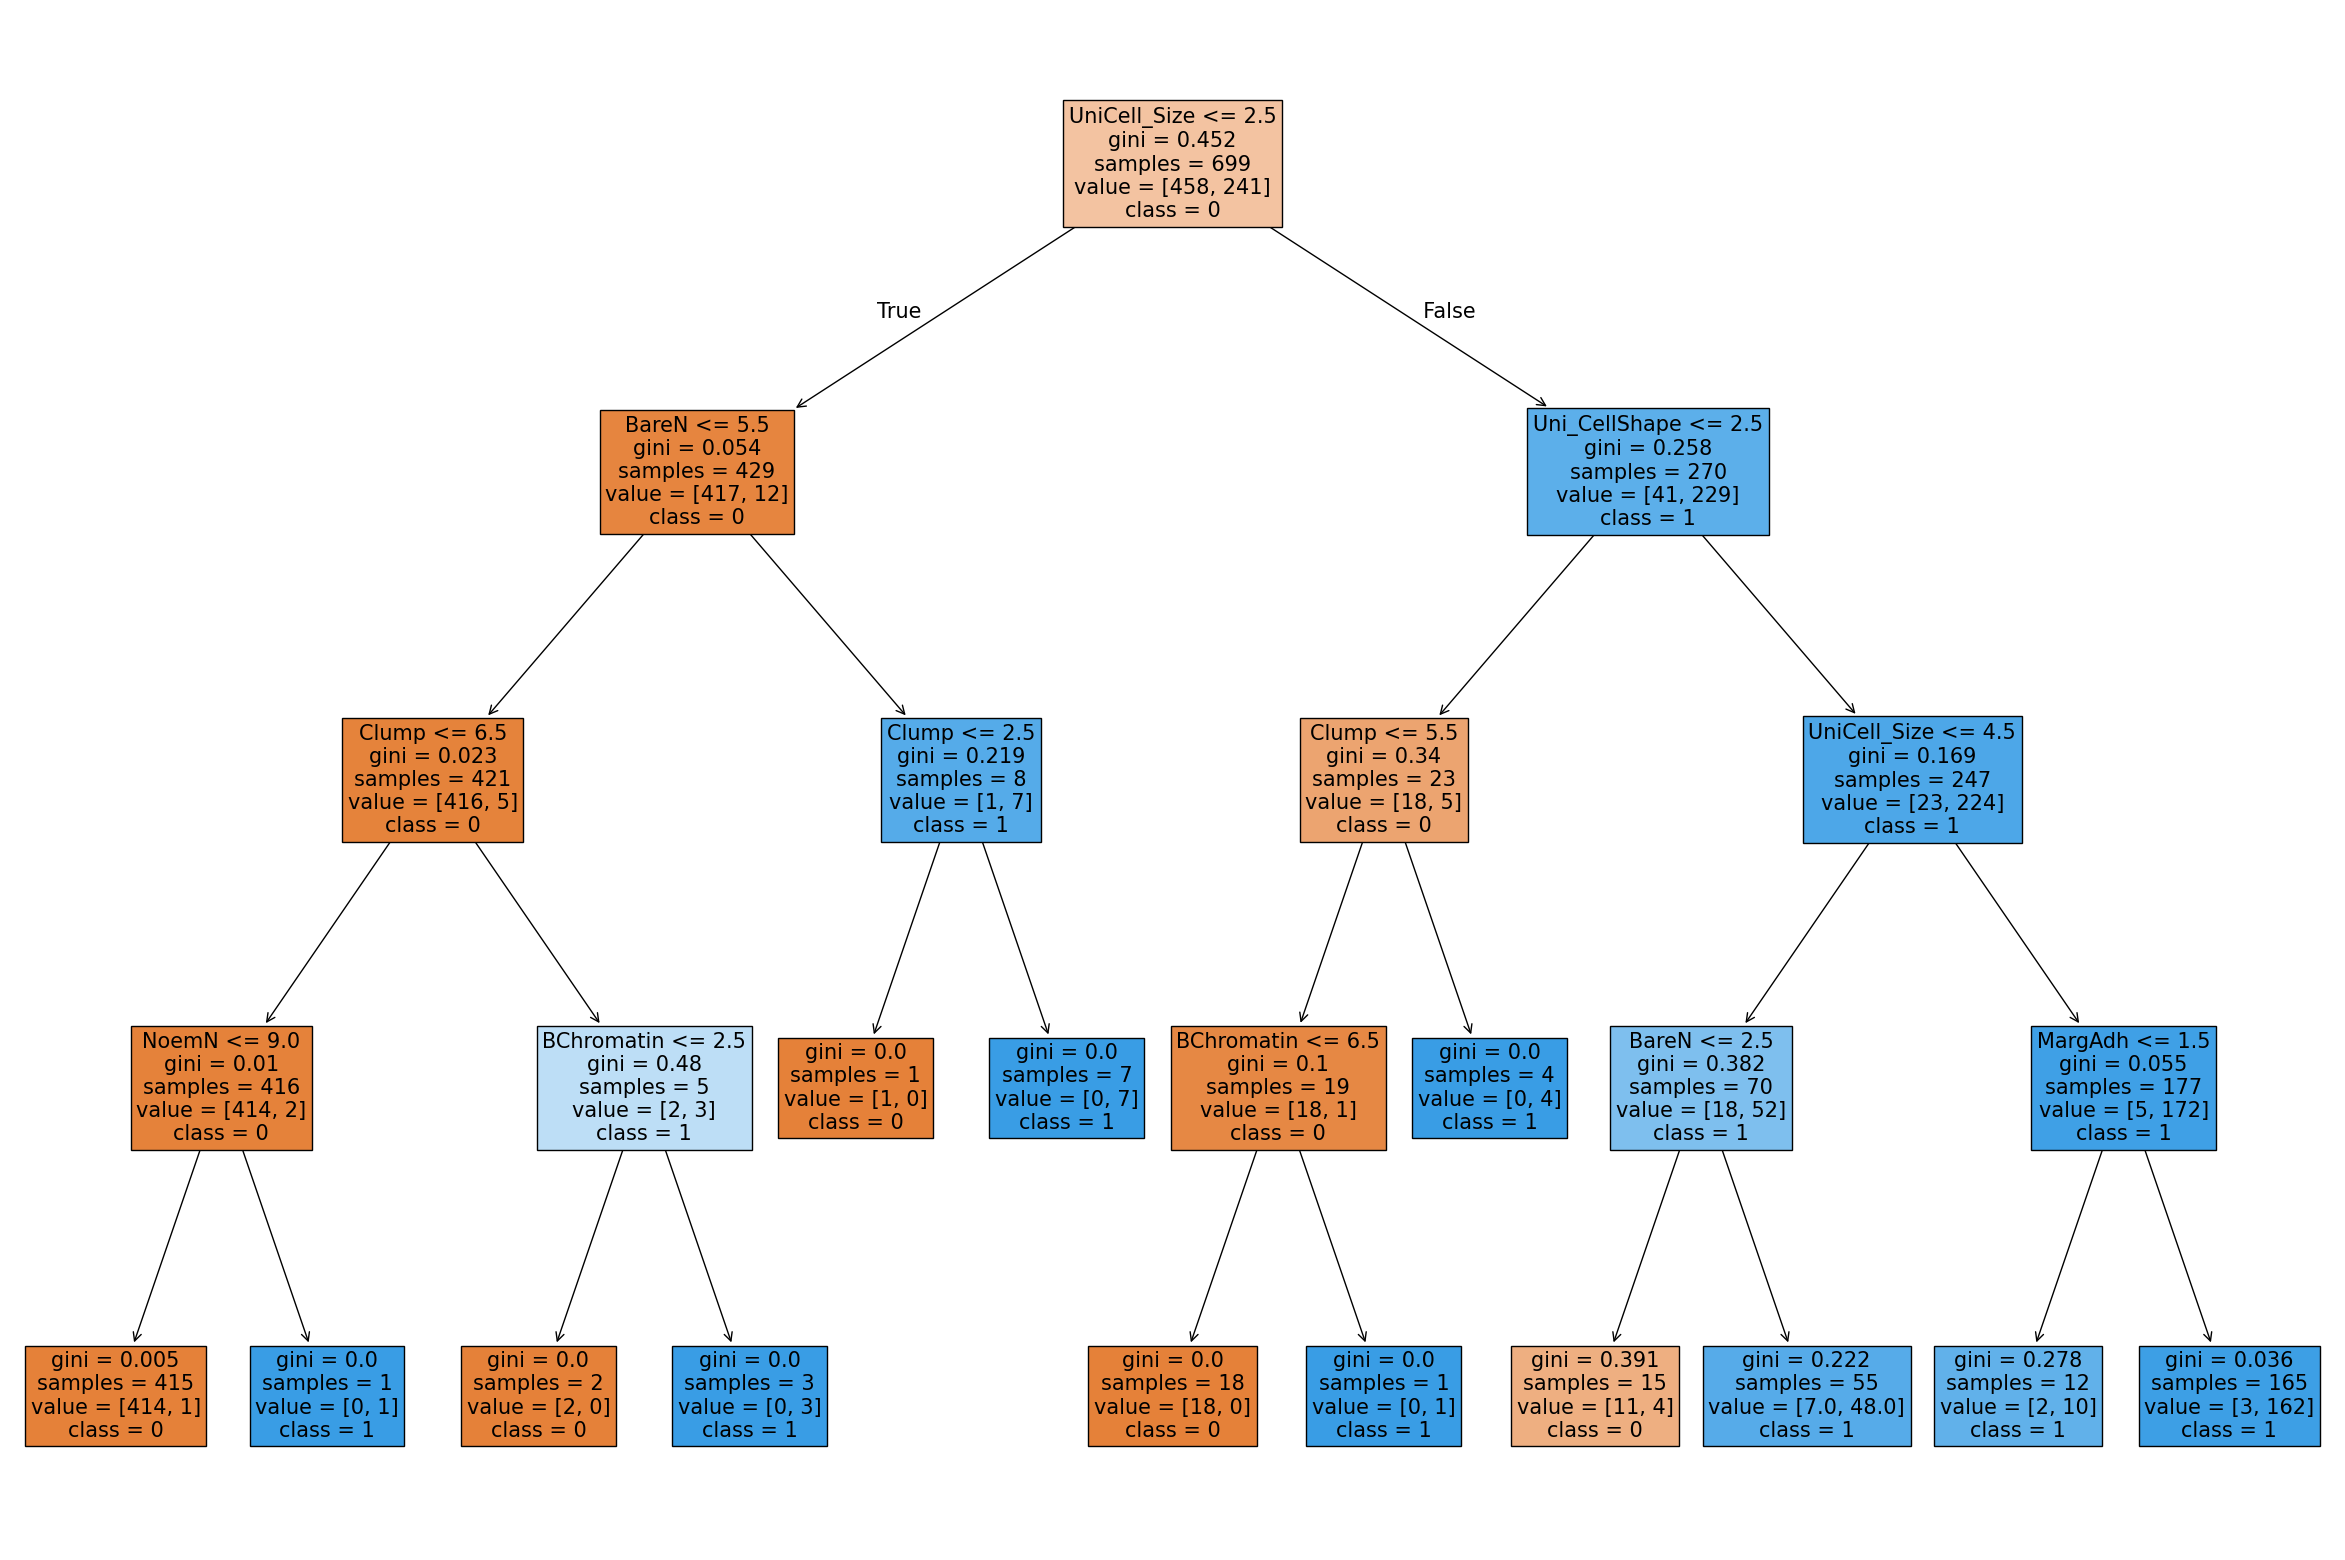

In [35]:
best_tree = gcv.best_estimator_
plt.figure(figsize=(30,20))
plot_tree(best_tree,feature_names=list(X.columns), class_names=['0','1'], filled=True,fontsize=15)
plt.show() 

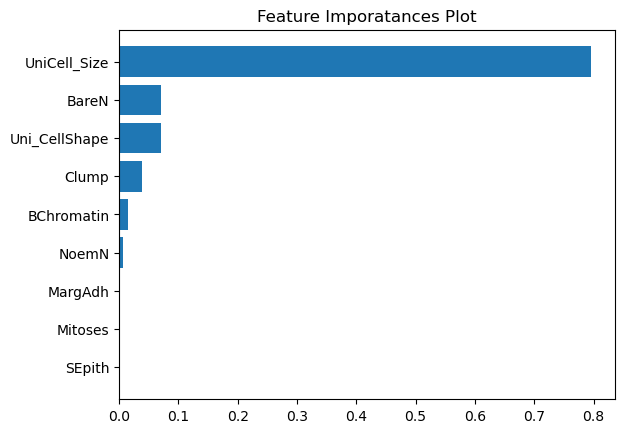

In [55]:
df_imp = pd.DataFrame({'feature':list(X.columns),
              'importance':best_tree.feature_importances_ })
df_imp.sort_values('importance', inplace=True)
plt.barh(df_imp['feature'], df_imp['importance'])
plt.title("Feature Imporatances Plot")
plt.show()